In [3]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
from scipy.fftpack import fft

In [11]:


# Define parameters
duration = 5  # seconds
sample_rate = 44100  # Hz

# Number of frames to record
frames = int(duration * sample_rate)

# Record audio
print("Recording...")
audio_signal = sd.rec(frames, samplerate=sample_rate, channels=1, dtype='float64')
sd.wait()  # Wait until recording is finished
print("Recording finished.")

# Flatten the recorded signal (if necessary)
audio_signal = audio_signal.flatten()

# Print shape of the recorded signal
print("Recorded signal shape:", audio_signal.shape)

Recording...
Recording finished.
Recorded signal shape: (220500,)


Recording...
Recording finished.
Playing back the recorded audio...
Playback finished.


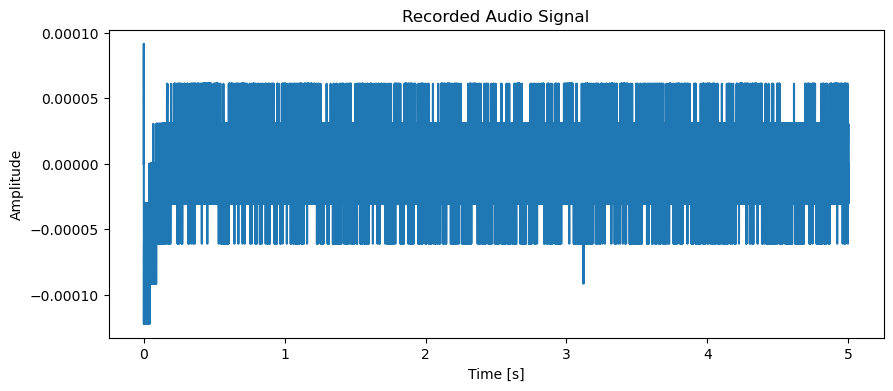

In [13]:
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt

def test_sd_rec(duration=5, sample_rate=44100):
    # Define parameters
    channels = 1  # Mono

    # Record audio
    print("Recording...")
    audio_signal = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=channels, dtype='float64')
    sd.wait()  # Wait until recording is finished
    print("Recording finished.")

    # Play back the recorded audio
    print("Playing back the recorded audio...")
    sd.play(audio_signal, samplerate=sample_rate)
    sd.wait()  # Wait until playback is finished
    print("Playback finished.")

    # Plot the recorded signal
    time = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)
    plt.figure(figsize=(10, 4))
    plt.plot(time, audio_signal)
    plt.title("Recorded Audio Signal")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.show()

# Run the test
test_sd_rec()


Recording...
Recording finished.


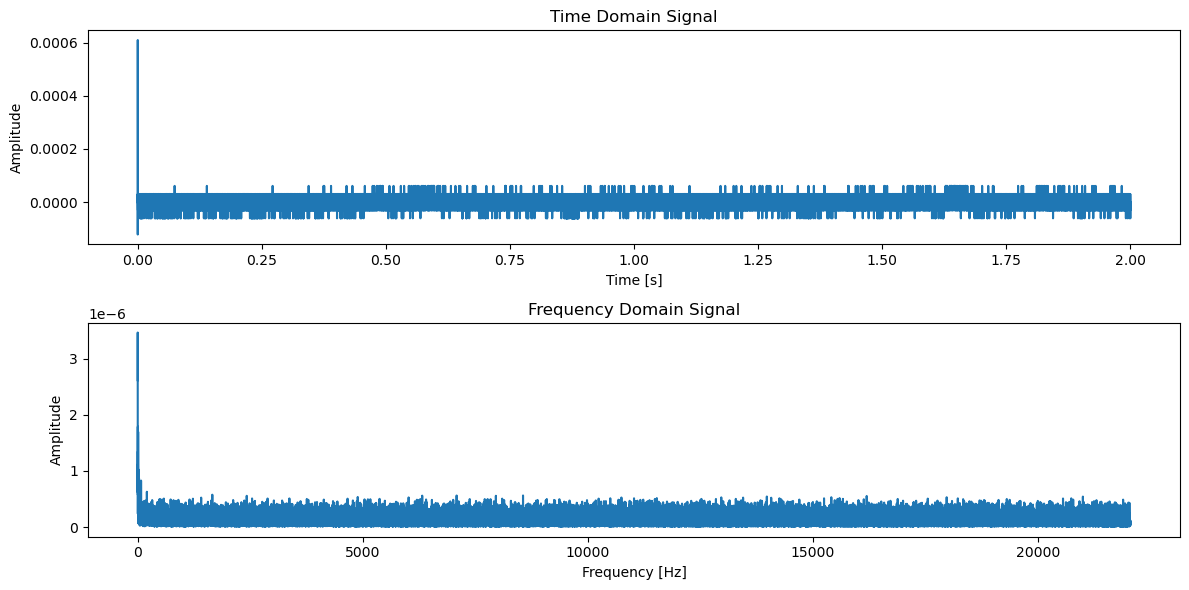

In [9]:


def analyze_microphone_signal(duration=2, sample_rate=44100):
    # Capture audio from microphone
    print("Recording...")
    audio_signal = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float64')
    sd.wait()  # Wait until recording is finished
    print("Recording finished.")
    
    # Flatten the array
    audio_signal = audio_signal.flatten()

    # Time-domain plot
    time = np.linspace(0, duration, int(duration * sample_rate), endpoint=False)
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(time, audio_signal)
    plt.title("Time Domain Signal")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    
    # Frequency-domain plot
    N = len(audio_signal)
    T = 1.0 / sample_rate
    yf = fft(audio_signal)
    xf = np.fft.fftfreq(N, T)[:N//2]
    plt.subplot(2, 1, 2)
    plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.title("Frequency Domain Signal")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Amplitude")

    # Show plots
    plt.tight_layout()
    plt.show()

# Example usage
analyze_microphone_signal()
